##Time Series Analysis##

The time series analysis or the tsa is a branch of data science that deals with the real_time data. Today we are going to work on female child birth dataset from the year of 1959.

From this data, we have to create a model that forecasts the child births on a day basis.

# Importing libraries

In [ ]:
# importing important libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
female_birth = pd.read_csv('/content/daily-total-female-births-CA.csv')

Now, let's have a first clear view at the dataset.

In [ ]:
female_birth.head(5)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


Let's start gaining some basic information about the dataset.

In [ ]:
# checking the shape

female_birth.shape

(365, 2)

Here, our data consits only two columns and the length of the is of 365 rows.

In [ ]:
# checking the info of the dataset
female_birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    365 non-null    object
 1   births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


Here, we can see that we don't have any null values in the data.

In [ ]:
female_birth.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


Inside the datset, we can see that date column is a seperate column. So, for the clean work process we will have to change the index column with the date column and also change it's data type to date_time data type.

In [ ]:
birth_df = pd.read_csv('/content/daily-total-female-births-CA.csv', index_col=[0], parse_dates=[0])

print(birth_df)

            births
date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44
...            ...
1959-12-27      37
1959-12-28      52
1959-12-29      48
1959-12-30      55
1959-12-31      50

[365 rows x 1 columns]


In [ ]:
birth_df

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


Now, let's plot the dataset

<Axes: xlabel='date'>

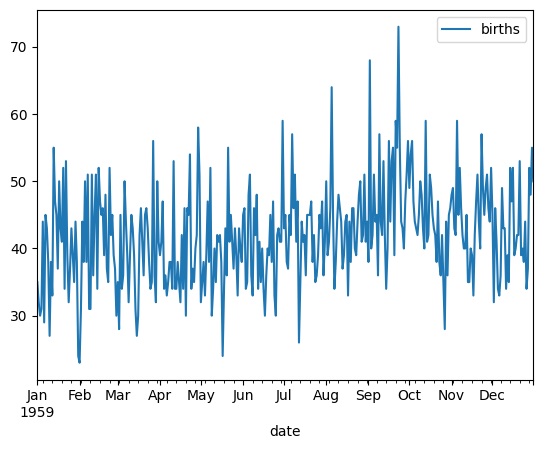

In [ ]:
birth_df.plot()

As we can see that there is a lot fluctuations in the data. Therefore, we will have to smooth the data set to understand properly.

In [ ]:
moving_avg_birth = birth_df.rolling(window=30).mean()

moving_avg_birth

,births
date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,NaN
1959-01-04,NaN
1959-01-05,NaN
...,...
1959-12-27,41.700000
1959-12-28,41.900000
1959-12-29,42.033333


<Axes: xlabel='date'>

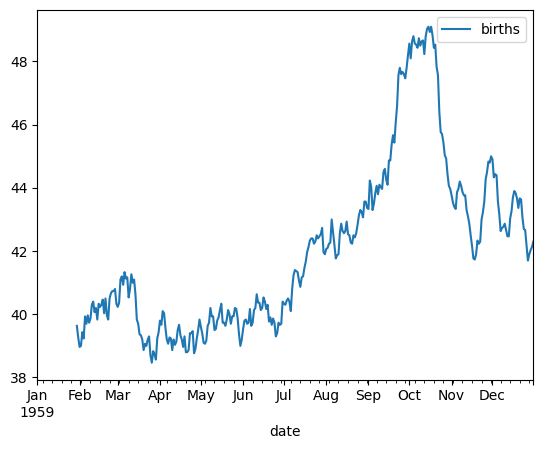

In [ ]:
moving_avg_birth.plot()

After smoothening the graph we can see the birth rate high and low plotings easily.



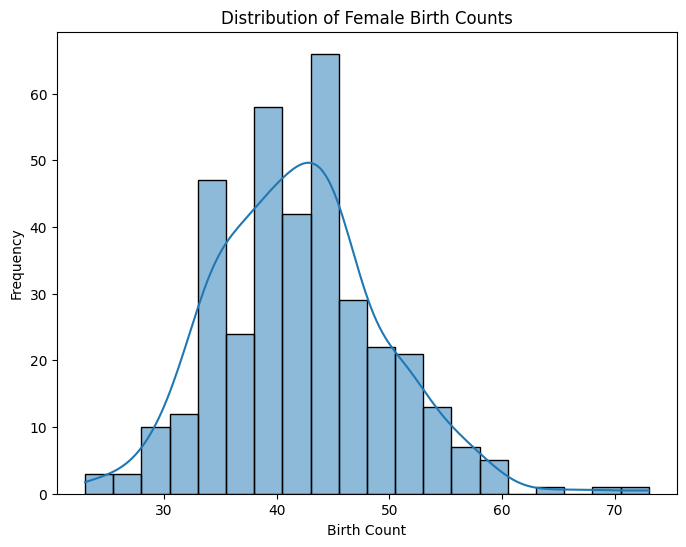

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(birth_df['births'], kde=True, bins=20)
plt.title('Distribution of Female Birth Counts')
plt.xlabel('Birth Count')
plt.ylabel('Frequency')
plt.show()

From the distribution plotting we can see that the dataset is not normally distributed and is highly skewed.

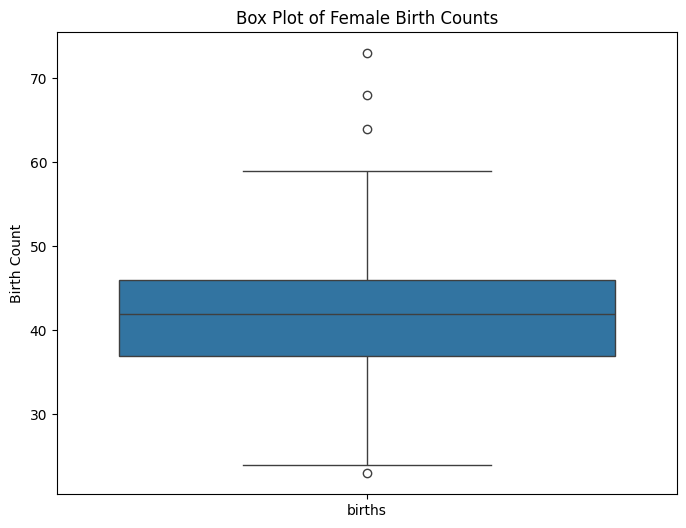

Missing Values:
 births    0
dtype: int64


In [ ]:
# Check for outliers using box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=birth_df)
plt.title('Box Plot of Female Birth Counts')
plt.ylabel('Birth Count')
plt.show()

# Check for missing values
missing_values = birth_df.isnull().sum()
print("Missing Values:\n", missing_values)

In the above plot we can see there are few outliers in the dataset.

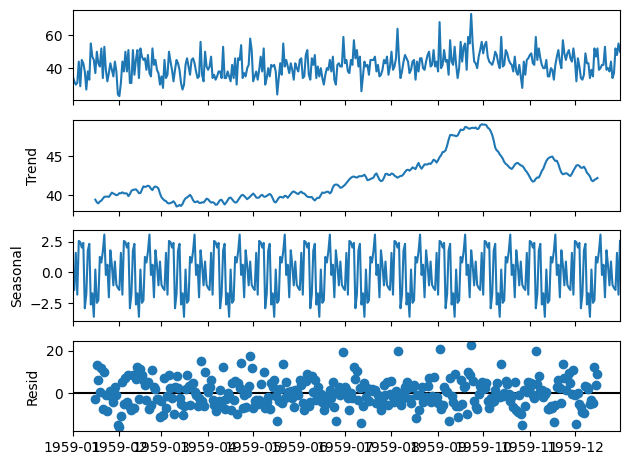

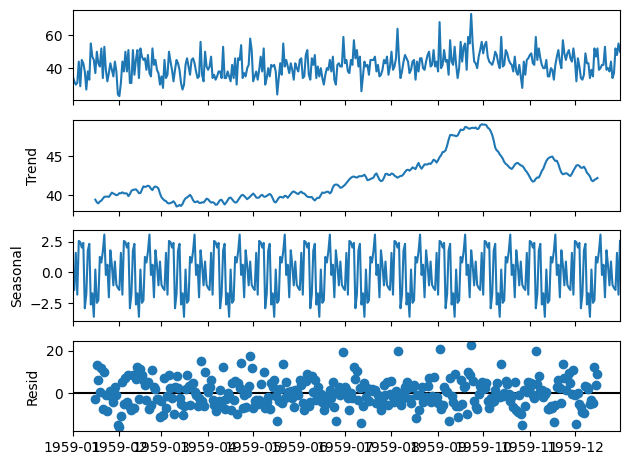

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(birth_df, model='additive', period=30).plot()

From seasonal decomposition, we can come to a conclusion that the data doesn't have any seasonality.

Now, we will apply ADF test

In [ ]:
# ADF test
# my null hypothesis will be - 'The data is not stationary'
# my alternative hypothesis will be 'The data is stationary'

from statsmodels.tsa.stattools import adfuller

adf = adfuller(birth_df, autolag='AIC')
print(adf)

print('p-value:', adf[1])


(-4.808291253559765, 5.2434129901498554e-05, 6, 358, {'1%': -3.448748905151901, '5%': -2.8696473721448728, '10%': -2.5710891239349585}, 2343.8290926464197)
p-value: 5.2434129901498554e-05


So, from the ADF test we can conclude that we can reject our null hypothesis and accept our alternative hypothesis which tells us that our data is stationary.


the data does not exhibit trends, seasonality, or other systematic patterns that evolve with time. Here's what it implies:

Constant Mean: The average value of the data points remains constant over time. There is no overall trend indicating a systematic increase or decrease in the values.

Constant Variance: The variability or spread of the data points remains consistent over time. The amplitude of fluctuations around the mean does not change systematically with time.

Constant Autocorrelation Structure: The relationship between observations at different time points, known as autocorrelation, remains constant over time. There are no systematic patterns in the correlation structure between past and future values.

No Seasonality: There are no recurring patterns or cycles that repeat at fixed intervals. Seasonality refers to predictable variations that occur at specific time intervals, such as daily, weekly, or monthly patterns.

In practical terms, having stationary data simplifies the analysis and modeling process because you can make more reliable forecasts and inferences. Stationary time series data allows you to apply a wider range of statistical techniques and models that assume stationarity, such as Autoregressive Integrated Moving Average (ARIMA) models.

But, before we will check if the data is having any correlation.

In [ ]:
# Durbin_Watson method to check the autocorrelation

sm.stats.durbin_watson(birth_df)

array([0.04624491])

Durbin watson method helps us to know if there's any correlation between the data. It normally gives the score between 0 to 4. Where 2 is the mid point which represents that there is no autocorrelation in the data.

But, if the scores lies between 0 to 2 then we can say that, our data is positively correlated.

If the score lies between 2 to 4, then it represents that the data is negatively correlated.

But, as we can see here, our tests score is 0.04. This means that our data is mostly positively correlated.

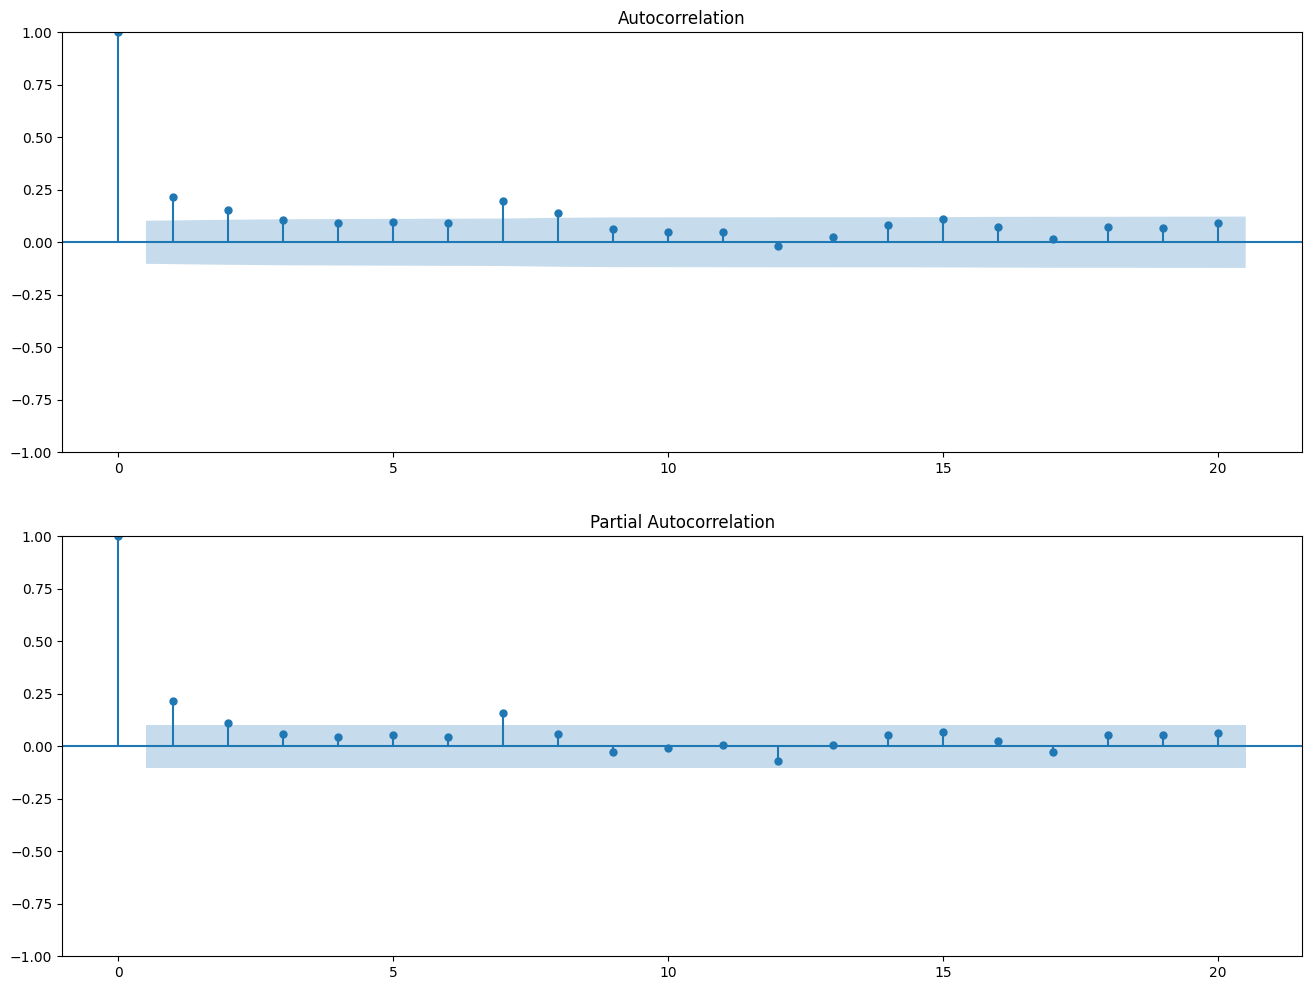

In [ ]:
# now we will plot the correlation of the data through ACF and PACF

fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(birth_df, lags=20, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(birth_df, lags=20, ax=ax2)


There is a correlation in our dataset but that is mostly is positively correlated.

Now we Create our models.

In [ ]:
# Splitting the data
train = birth_df[0:300]
test= birth_df[300:]

# ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

Now before training our model we will find the best pdq combination.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import itertools

In [ ]:
start = datetime.strptime('1959-01-01', '%Y-%m-%d')
end = datetime.strptime('1959-12-31', '%Y-%m-%d')

p=d=q=range(0,5)

pdq = list(itertools.product(p,d,q))

print(pdq)

best_aic = np.inf
print(best_aic)

best_pdq = None

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (0, 3, 0), (0, 3, 1), (0, 3, 2), (0, 3, 3), (0, 3, 4), (0, 4, 0), (0, 4, 1), (0, 4, 2), (0, 4, 3), (0, 4, 4), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (1, 3, 0), (1, 3, 1), (1, 3, 2), (1, 3, 3), (1, 3, 4), (1, 4, 0), (1, 4, 1), (1, 4, 2), (1, 4, 3), (1, 4, 4), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (2, 3, 0), (2, 3, 1), (2, 3, 2), (2, 3, 3), (2, 3, 4), (2, 4, 0), (2, 4, 1), (2, 4, 2), (2, 4, 3), (2, 4, 4), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 0, 4), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 2, 0), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 2, 4), (3, 3, 0)

In [ ]:
for para in pdq:

    model = sm.tsa.ARIMA(train, order = para)
    result = model.fit()

    if result.aic < best_aic:
      best_aic = result.aic
      best_pdq = para

    print(f'ARIMA {para} - AIC: {result.aic}')

ARIMA (0, 0, 0) - AIC: 2064.0770531296403
ARIMA (0, 0, 1) - AIC: 2055.7468553849335
ARIMA (0, 0, 2) - AIC: 2053.6944954652085
ARIMA (0, 0, 3) - AIC: 2053.9067995669443
ARIMA (0, 0, 4) - AIC: 2055.372188054401
ARIMA (0, 1, 0) - AIC: 2193.0317390259324
ARIMA (0, 1, 1) - AIC: 2034.6653663949905
ARIMA (0, 1, 2) - AIC: 2034.532708152886
ARIMA (0, 1, 3) - AIC: 2036.1811764381496
ARIMA (0, 1, 4) - AIC: 2038.1808830647763
ARIMA (0, 2, 0) - AIC: 2506.893679697657
ARIMA (0, 2, 1) - AIC: 2194.4013995664427
ARIMA (0, 2, 2) - AIC: 2041.5243911710652
ARIMA (0, 2, 3) - AIC: 2041.4773662637454
ARIMA (0, 2, 4) - AIC: 2043.0697584909599
ARIMA (0, 3, 0) - AIC: 2855.1597809653795
ARIMA (0, 3, 1) - AIC: 2507.186813801418
ARIMA (0, 3, 2) - AIC: 2201.0400197541785
ARIMA (0, 3, 3) - AIC: 2056.45255288338
ARIMA (0, 3, 4) - AIC: 2057.2875645710556
ARIMA (0, 4, 0) - AIC: 3216.6634846451825
ARIMA (0, 4, 1) - AIC: 2854.2343823181354
ARIMA (0, 4, 2) - AIC: 2512.384146032629
ARIMA (0, 4, 3) - AIC: 2226.8984719774044

In [ ]:
best_pdq

(3, 1, 4)

In [ ]:
best_aic

2030.3330380285906

In [ ]:
arima = sm.tsa.ARIMA(train, order= (2,2,4))

In [ ]:
results=arima.fit()

In [ ]:
results.aic

2046.7664474241528

In [ ]:
prediction = results.forecast(steps=65)

In [ ]:
prediction

1959-10-28    41.811291
1959-10-29    43.989445
1959-10-30    42.963779
1959-10-31    42.611938
1959-11-01    44.245223
                ...    
1959-12-27    44.598258
1959-12-28    43.842670
1959-12-29    44.230053
1959-12-30    44.383477
1959-12-31    43.818101
Freq: D, Name: predicted_mean, Length: 65, dtype: float64

In [ ]:
test

,births
date,
1959-10-28,44
1959-10-29,36
1959-10-30,45
1959-10-31,46
1959-11-01,48
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [ ]:
from sklearn.metrics import mean_squared_error
rsme = np.sqrt(mean_squared_error(test,prediction))

In [ ]:
rsme

6.392825546143317

<Axes: xlabel='date'>

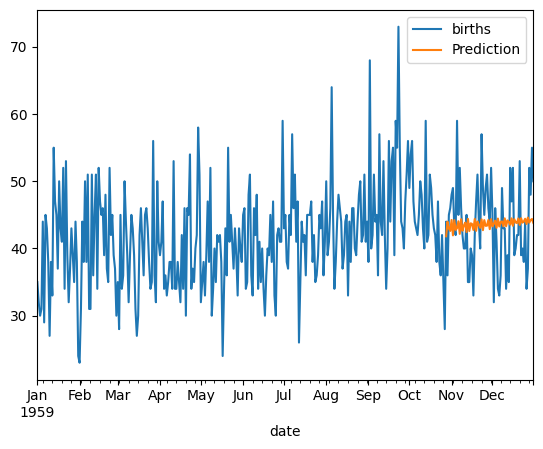

In [ ]:
birth_df['births'].plot(legend=True, label='births')


prediction.plot(legend=True, label='Prediction')

While creating ARIMA model, there were some challenges like finding the right fit of pdq that gave us the best results.
At first, I went with the strategy to select the particular combination of pdq which gave us the lowest score in AIC and choose them as our best combination of our model training.
But, during the process we found that the combination of pdq which gave us the lowest AIC were not being the best in training. I faced a lot of overfitting issues with the strategy.
So, we went with the manual search of the best pdq combination. Therefore, after searching and compiling random pdq combination we found the best pdq that showed us some good results in the training and predicting.

# Holtwinters Model

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
model=ExponentialSmoothing(train.births, trend = 'mul', seasonal = 'mul', seasonal_periods=109).fit()

In [ ]:
test_prediction = model.forecast(65)

In [ ]:
test_prediction

1959-10-28    46.427484
1959-10-29    32.552003
1959-10-30    38.568637
1959-10-31    53.992466
1959-11-01    42.346847
                ...    
1959-12-27    53.855072
1959-12-28    45.408635
1959-12-29    46.570497
1959-12-30    49.806814
1959-12-31    47.604866
Freq: D, Length: 65, dtype: float64

<Axes: xlabel='date'>

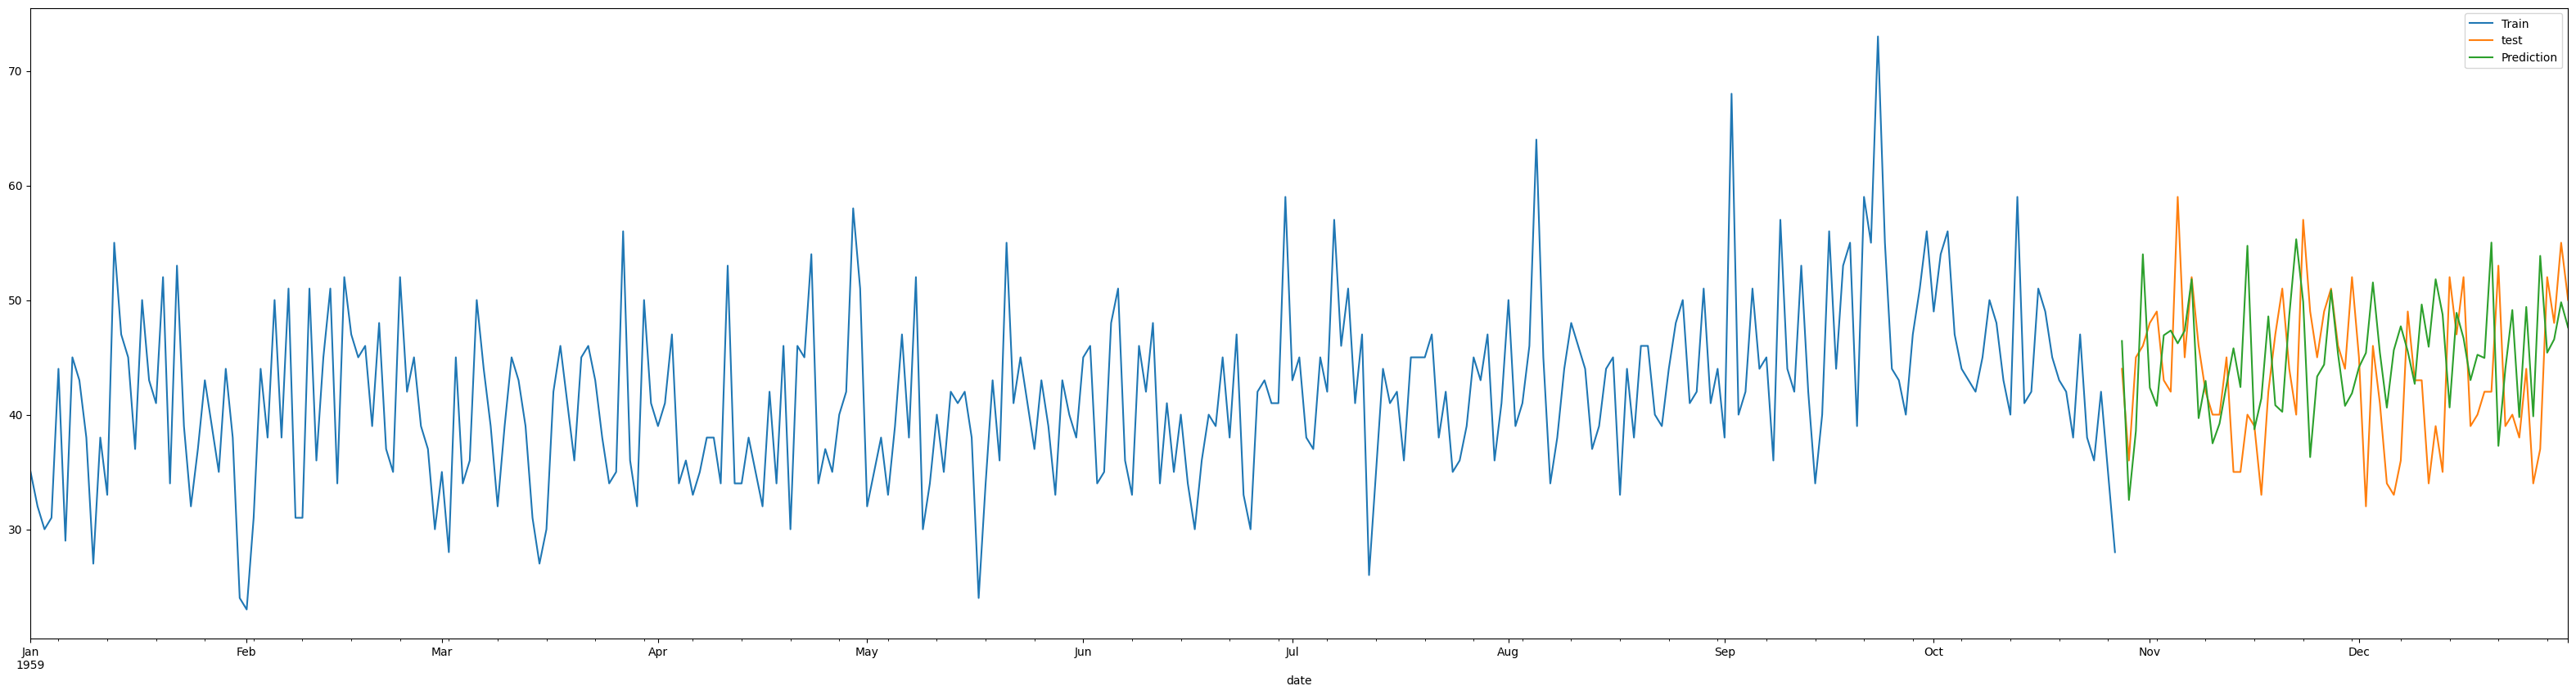

In [ ]:
train['births'].plot(legend=True, label='Train', figsize=(40,10))
test['births'].plot(legend=True, label='test')


test_prediction.plot(legend=True, label='Prediction')

After training our model with the ARIMA and being unsatisfied we went with the plan to try another algorithm to train our model. So, that's how we went with the Holtwinter's model.
This model was also not final chosen model but was a part of experiment to achieve the best results possible. So, we started to set our parameters for training the dataset with the algorithm and found some issues here too.
Those issues were mainly from the parameters in the syntax. So, we explored a bit  more on the web to read some articles and found a way to experiment with the parameters in the model.
So, the trend and seasonal and seasonal_periods parameters were experimented. Sometime, I set the first two parameters to add and multiply irrespectively with all the possible combination. But, the hardest parameter was the seasonal_period. This parameter works on the idea of to set the number where you find the data is showing some seasonal kind of pattern. It can be weekly, monthly, yearly or any number of days according to the graph.
Therefore, I spent a nice amount of time in research and manual checks of several parameters, from 10 to 150. I checked with all of the numbers in the range manually and checked the plotting to see which number gave us the best result. After checking most of them, I was satisfied with the prediction of 3 seasonal_periods number, those were 105, 109 and 118. But, cheking througly among the three we went with the 109 seasonal_period parameter. Hence , this way we found that our prediction became much better with the holtwinter's ExponentialSmoothing model.

Here, we can see that the holtwinters model is being proved as the best algorithm for predicting the female child birth. Although, there is a scope of improvement but after spending time with experimenting on parameters we can say that this models suits the best for its accuracy.